# Vinho Verde - Exercise

We just performed linear regression involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables (multiple linear regression).

In this exercise we will use a dataset with variants of the Portuguese *Vinho Verde* wine. We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will try to predict the quality of the wine.

Saturday I am receiving friends for dinner. I would like to offer my guests a glass of wine. I am currently shopping and I've got my eye on the next bottle of wine from Portugal. *(It is unbelievable what information can be found on a wine label these days)*

<table>
    <tr>
        <td>
            volatile acidity: 0.650<br />
            citric acid: 0.00<br />
            residual sugar: 1.2<br />
            chlorides: 0.089<br />
            free sulfur dioxide: 21.0<br />
            density: 1.3946<br />
            pH: 3.39<br />
            sulphates: 0.53<br />
            alcohol: 9.6<br />
        </td>
        <td>
            <img src="./resources/calamares.jpg"  style="height: 250px"/>
        </td>
    </tr>
</table>

Would this wine be a good choice? Can you help me?

## 1. Import and read the data

Import all the required libraries :

In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

Import the file *winequality.csv* using Pandas.

In [49]:
winequality_df = pd.read_csv("./resources/winequality.csv")
#winequality_df.head()
winequality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Explore the data

Can you check the number of rows and columns in our dataset?

In [50]:
print(winequality_df.shape)

(1599, 12)


What features of the wines are included in the data?

In [51]:
list(winequality_df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Can you print the quality of the first 25 wines? What values are being used?

In [52]:
winequality_df["quality"].head(25)

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
20    6
21    5
22    5
23    5
24    6
Name: quality, dtype: int64

Can you print all different values and count them?

In [53]:

print(winequality_df["quality"].unique() , len(winequality_df["quality"].unique()), sep="\n")

[5 6 7 4 8 3]
6


Can you check on a 2-D graph if there's any relationship between the fixed acidity and the pH of the wine?

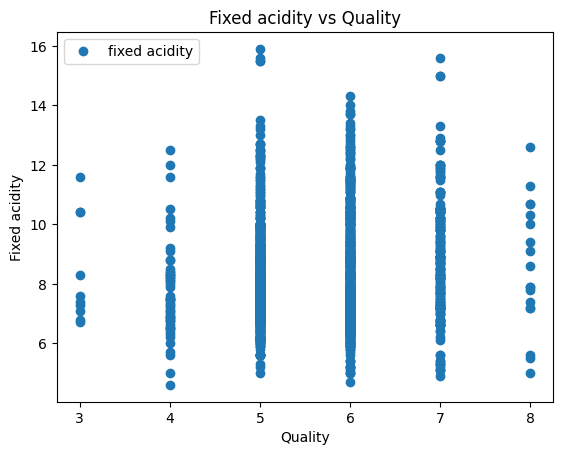

In [54]:
winequality_df.plot(x='quality', y='fixed acidity', style='o')


plt.title('Fixed acidity vs Quality')
plt.xlabel('Quality')
plt.ylabel('Fixed acidity')
plt.show()

What can you see in the graph? The higher the fixed acidity, the ... the pH. You shoudn't be surprised, since pH is a scale used to specify how acidic a fluid is.

## 3. Histograms

Let’s check the quality of the wines. Create a histogram. What qualities occur the most?

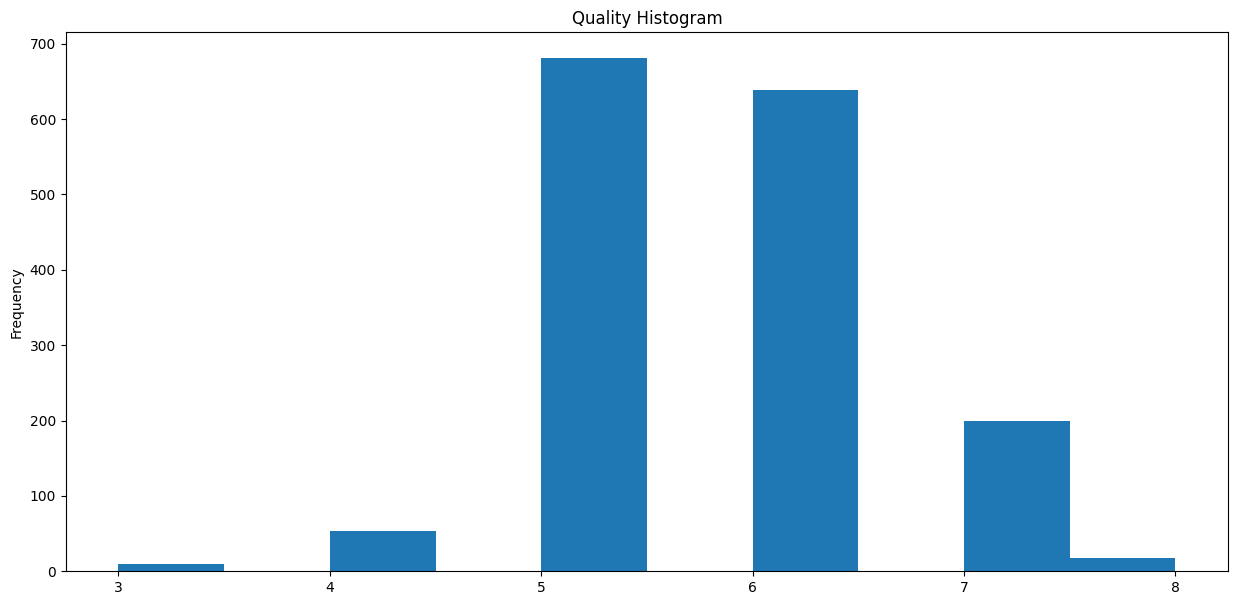

In [55]:
winequality_df['quality'].plot(kind='hist', title='Quality Histogram', bins=int(10/1), figsize=(15, 7));

## 4. Data splicing

Our next step is to divide the data into independent variables and dependent variables, whose values are to be predicted. To make the predictions we are only using the following independent variables

- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- density
- pH
- sulphates
- alcohol

to predict the quality. Create the two datasets and next, split 80% of the data to the training set and 20% to the test set.

In [56]:
X = winequality_df['quality'].values.reshape(-1,1)
y = winequality_df[['volatile acidity','citric acid','residual sugar','chlorides','chlorides','density', 'pH', 'sulphates', 'alcohol']].values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Print the independent and dependent training set.

In [57]:
print(X_train)


[[5]
 [5]
 [5]
 ...
 [6]
 [6]
 [5]]


In [58]:
print(y_train)

[[ 0.54  0.45  2.3  ...  3.39  0.62  9.4 ]
 [ 0.26  0.45  3.3  ...  3.13  0.54  9.6 ]
 [ 0.35  0.55  2.1  ...  3.26  0.79 10.6 ]
 ...
 [ 0.57  0.31  2.   ...  3.29  0.69  9.5 ]
 [ 0.47  0.49  4.3  ...  3.3   0.68 12.7 ]
 [ 0.98  0.32  2.3  ...  3.25  0.48  9.4 ]]


## 5. Train the model

Now train the model.

In [59]:
model = LinearRegression()
model.fit(X_train, y_train) # training the model

LinearRegression()

In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [60]:
coefficients = model.coef_.reshape(9,-1)
variables = np.array([['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]).reshape(9,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

                               0
(volatile acidity,)    -0.088254
(citric acid,)          0.055713
(residual sugar,)       0.023747
(chlorides,)           -0.007434
(free sulfur dioxide,) -0.007434
(density,)             -0.000391
(pH,)                  -0.011672
(sulphates,)            0.054043
(alcohol,)              0.612100


This means that for a unit increase in *density*, there is an increase of 5.17 units in the quality of the wine. Similarly, a unit decrease in *chlorides* results in an increase of 1.85 units in the quality of the wine. 

## 6. Predictions

Now that we have trained our model, it’s time to make some predictions. Do the prediction on test data.

In [65]:
y_pred = model.predict(X_test)

Print the actual and predicted values for the first 25 wines from the test set.

In [67]:
compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(compare_df.head(25))

      Actual  Predicted
0    0.47000   0.498811
1    0.43000   0.291870
2    2.10000   2.561559
3    0.17100   0.084397
4    0.17100   0.084397
5    0.99820   0.996619
6    3.17000   3.305703
7    0.76000   0.678176
8   10.80000  10.630312
9    0.82000   0.587065
10   0.00000   0.236158
11   4.10000   2.537812
12   0.09500   0.091831
13   0.09500   0.091831
14   0.99854   0.997010
15   3.36000   3.317375
16   0.53000   0.624133
17   9.60000  10.018212
18   0.29000   0.410557
19   0.33000   0.347583
20   2.05000   2.585306
21   0.06300   0.076963
22   0.06300   0.076963
23   0.99516   0.996229
24   3.26000   3.294031


Visualize the comparison result as a bar graph. Take only the first 10 results.

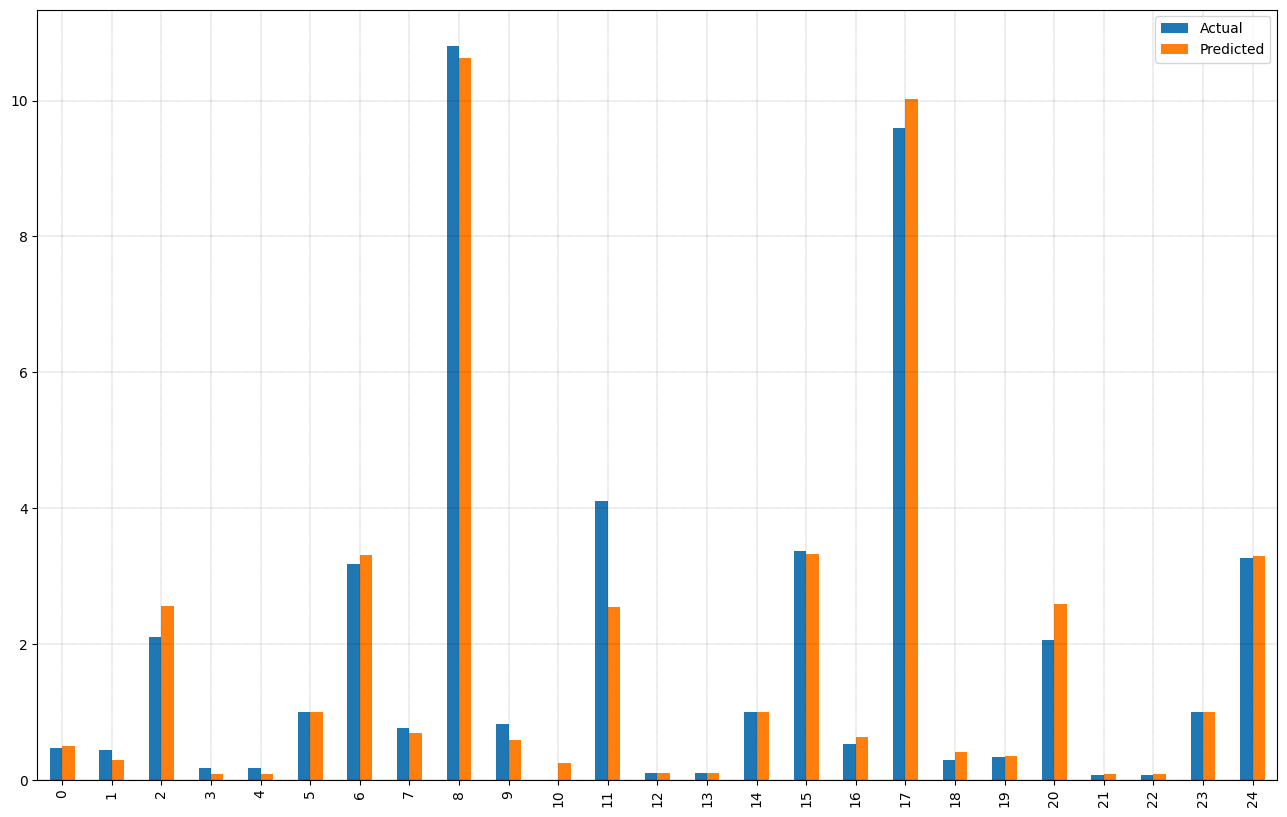

In [68]:
compare25_df = compare_df.head(25)
compare25_df.plot(kind='bar', figsize=(16,10))
plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()

The final step is to evaluate the performance of the algorithm. Since R² = 1 corresponds to the perfect fit, what can you conclude?

In [69]:
print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error =", round(metrics.mean_squared_error(y_test, y_pred), 2))
print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_test, y_pred), 2))

Mean absolute error = 0.22
Mean squared error = 0.28
Root Mean Squared Error = 0.53
R2 score = 0.06


In [61]:
# answer: value of R²?
# ok?

Finaly can you predict the quality of my wine (details above)? Is it a good wine according to our model?

In [71]:
print(model.predict([[0.650],[0.00],[1.2],[0.089],[21.0],[1.3946], [3.39], [0.53], [9.6]]))
#fout

[[ 9.70969160e-01 -6.19178833e-03  2.43451166e+00  1.24167322e-01
   1.24167322e-01  9.98708671e-01  3.36814891e+00  3.89046819e-01
   7.35557744e+00]
 [ 1.02833417e+00 -4.24049346e-02  2.41907603e+00  1.28999209e-01
   1.28999209e-01  9.98962502e-01  3.37573579e+00  3.53918948e-01
   6.95771248e+00]
 [ 9.22429535e-01  2.44501047e-02  2.44757258e+00  1.20078801e-01
   1.20078801e-01  9.98493892e-01  3.36172924e+00  4.18770402e-01
   7.69223241e+00]
 [ 1.02047958e+00 -3.74465192e-02  2.42118952e+00  1.28337612e-01
   1.28337612e-01  9.98927746e-01  3.37469697e+00  3.58728764e-01
   7.01218938e+00]
 [-8.24996971e-01  1.12755825e+00  2.91776572e+00 -2.71079303e-02
  -2.71079303e-02  9.90761831e-01  3.13062120e+00  1.48881939e+00
   1.98118111e+01]
 [ 9.05255333e-01  3.52917635e-02  2.45219377e+00  1.18632208e-01
   1.18632208e-01  9.98417899e-01  3.35945785e+00  4.29287146e-01
   7.81134705e+00]
 [ 7.29153573e-01  1.46460551e-01  2.49957879e+00  1.03799057e-01
   1.03799057e-01  9.9763867

In [62]:
# answer: quality of wine?
#